In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("D:/maria project/beer.csv")


In [27]:
print(df.columns)

Index(['Temp Med', 'Temp Min', 'Temp Max', 'Prec', 'weekend', 'cons'], dtype='object')


In [28]:
df.columns = ['Temp Med', 'Temp Min', 'Temp Max', 'Prec', 'weekend', 'cons']

In [29]:
print(df.describe())

         Temp Med    Temp Min    Temp Max        Prec     weekend        cons
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000
mean    21.226356   17.461370   26.611507    5.196712    0.284932   25.401367
std      3.180108    2.826185    4.317366   12.417844    0.452001    4.399143
min     12.900000   10.600000   14.500000    0.000000    0.000000   14.343000
25%     19.020000   15.300000   23.800000    0.000000    0.000000   22.008000
50%     21.380000   17.900000   26.900000    0.000000    0.000000   24.867000
75%     23.280000   19.600000   29.400000    3.200000    1.000000   28.631000
max     28.860000   24.500000   36.500000   94.800000    1.000000   37.937000


In [30]:
X = df.iloc[:,df.columns != 'cons']

In [31]:
Y = df.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [32]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

           Coefficient
Temp Med  1.000000e+00
Temp Min -1.878336e-16
Temp Max -3.389796e-16
Prec      2.462771e-17
weekend   3.542920e-17


In [34]:
y_pred = model.predict(X_test)


In [35]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

     Actual  Predicted
106   21.42      21.42
259   27.26      27.26
45    22.90      22.90
26    23.60      23.60
78    21.64      21.64
346   24.54      24.54
90    22.52      22.52
311   20.24      20.24
239   16.28      16.28
6     24.00      24.00


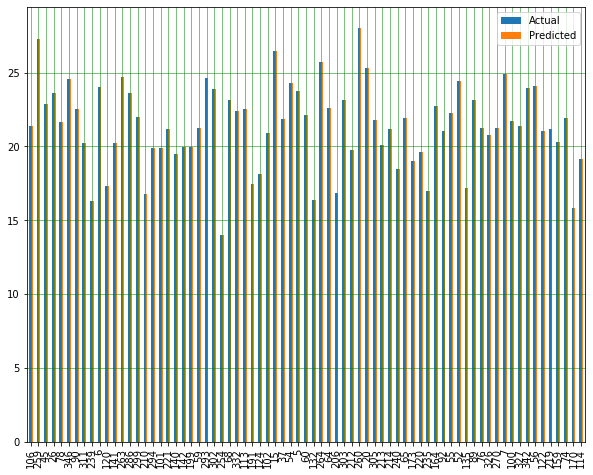

In [36]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [37]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -3.552713678800501e-15
Root Mean Square Error 
 2.895807225220121e-15
R^2 Value: 
 1.0
